In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('./MyDrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./MyDrive


In [0]:
TRAIN_DIR = "./MyDrive/My Drive/ai/workspace/data/dental_image/train/"

In [0]:
IM_WIDTH = 224
IM_HEIGHT = 224

In [0]:
datagen = ImageDataGenerator()

## 디렉토리에서 이미지를 읽을 객체를 생성
#### target_size = (이미지 가로, 이미지 세로)
#### batch_size = 한번에 리턴할 이미지의 개수
#### class_mode = 분류방법, categorical(다중분류) binary(이중 분류 - 0, 1)
#### shuffle = 이미지를 섞을 여부

In [6]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size=30,
    class_mode='categorical',
    shuffle=True
)

Found 150 images belonging to 3 classes.


In [7]:
train_generator.next()

(array([[[[192., 154., 105.],
          [198., 158., 109.],
          [196., 155., 109.],
          ...,
          [ 61.,  14.,   8.],
          [ 61.,  13.,   9.],
          [ 61.,  13.,   9.]],
 
         [[197., 154., 112.],
          [196., 154., 112.],
          [195., 153., 111.],
          ...,
          [ 61.,  13.,   9.],
          [ 62.,  14.,  10.],
          [ 62.,  13.,   9.]],
 
         [[198., 155., 113.],
          [196., 152., 113.],
          [199., 155., 116.],
          ...,
          [ 62.,  11.,  10.],
          [ 62.,  11.,  10.],
          [ 63.,  14.,  10.]],
 
         ...,
 
         [[120.,  39.,  36.],
          [113.,  32.,  29.],
          [115.,  34.,  31.],
          ...,
          [184., 148., 124.],
          [185., 149., 125.],
          [186., 150., 126.]],
 
         [[111.,  32.,  28.],
          [114.,  33.,  30.],
          [116.,  35.,  32.],
          ...,
          [185., 149., 125.],
          [187., 151., 127.],
          [186., 148., 125.

### img와 label 각각 리턴

In [0]:
img, label = train_generator.next()

In [9]:
img.shape

(30, 224, 224, 3)

In [10]:
label.shape

(30, 3)

## 폴더명을 기준으로 class가 나뉘어짐

In [11]:
train_generator.class_indices

{'cured': 0, 'decayed': 1, 'healthy': 2}

In [12]:
label_num = np.argmax(label, 1)
label_num

array([2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 0, 2, 2, 1, 2])

In [13]:
label_key = train_generator.class_indices.keys()
label_key = list(label_key)
label_key

['cured', 'decayed', 'healthy']

In [0]:
label_str = [ label_key[x] for x in label_num]

In [15]:
label_str

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'cured',
 'healthy',
 'cured',
 'healthy',
 'healthy',
 'healthy',
 'decayed',
 'cured',
 'decayed',
 'decayed',
 'decayed',
 'cured',
 'decayed',
 'healthy',
 'decayed',
 'healthy',
 'decayed',
 'healthy',
 'cured',
 'decayed',
 'cured',
 'healthy',
 'healthy',
 'decayed',
 'healthy']

In [16]:
(img[0]/255.0).shape

(224, 224, 3)

## 이미지 하나만 뽑아보기

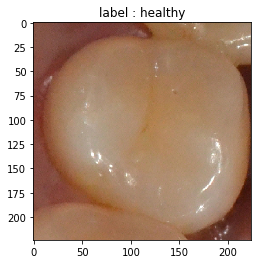

In [17]:
plt.title(f"label : {label_str[0]}")
plt.imshow(img[0]/255.0)

## 30개의 이미지 출력해 보기

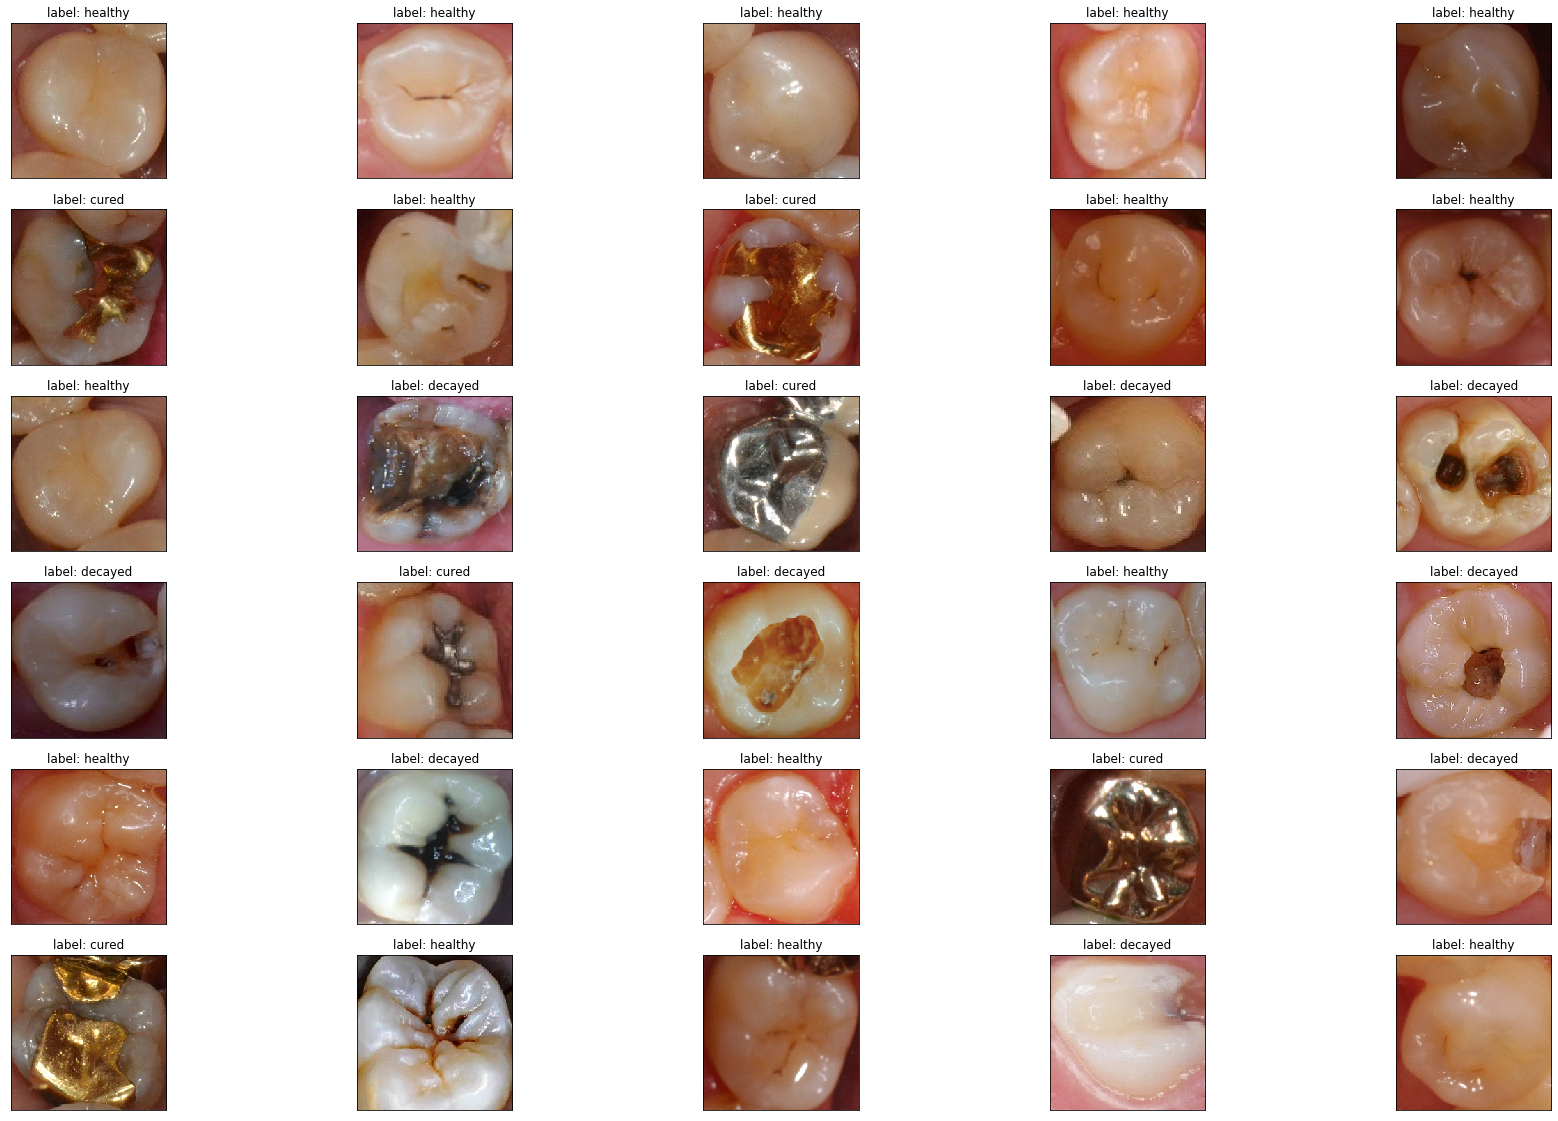

In [18]:
fig = plt.figure(figsize=(30, 20))

for i in range(30):
    subplot = fig.add_subplot(6, 5, i+1)
    
    subplot.set_xticks([])
    
    subplot.set_yticks([])
    
    subplot.set_title(f"label: {label_str[i]}")
    
    subplot.imshow(img[i]/255.0)
    
plt.show()

In [0]:
datagen2 = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [20]:
train_generator2 = datagen2.flow_from_directory(
    TRAIN_DIR,
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 150 images belonging to 3 classes.


In [0]:
img, label = train_generator2.next()

## 일부 데이터에 대해서 데이터 증강 실습

In [22]:
import time
index = 0
all_generate_img = []
tmp_img = img[0].reshape(-1, IM_WIDTH, IM_HEIGHT, 3) / 255.0
for generate_img in datagen2.flow(tmp_img):
    print(f"{index+1} 번째   {generate_img}")
    all_generate_img.append(generate_img)
    index += 1
    if index > 20:
        break

1 번째   [[[[0.7235586  0.5607766  0.39162496]
   [0.7468853  0.56078434 0.43133426]
   [0.75516576 0.56068355 0.44667566]
   ...
   [0.5882414  0.22352788 0.20392613]
   [0.5882414  0.22352788 0.20392613]
   [0.5882414  0.22352788 0.20392613]]

  [[0.726422   0.5595745  0.39678678]
   [0.74134433 0.5608285  0.42424417]
   [0.7515924  0.5621659  0.44645014]
   ...
   [0.5882414  0.22352788 0.20392613]
   [0.5882414  0.22352788 0.20392613]
   [0.5882414  0.22352788 0.20392613]]

  [[0.7362038  0.5472129  0.41446692]
   [0.7417826  0.5581731  0.43196884]
   [0.74526685 0.5653542  0.44535527]
   ...
   [0.5882414  0.22352788 0.20392613]
   [0.5882414  0.22352788 0.20392613]
   [0.5882414  0.22352788 0.20392613]]

  ...

  [[0.78580755 0.6657327  0.64164346]
   [0.78431374 0.6627451  0.64389414]
   [0.7837912  0.66222256 0.64902335]
   ...
   [0.54823035 0.31411704 0.24509494]
   [0.54690886 0.31395185 0.244269  ]
   [0.5455873  0.31378666 0.24344304]]

  [[0.78513354 0.6643847  0.6423175 ]


## 원본과 증강 데이터 이미지 출력

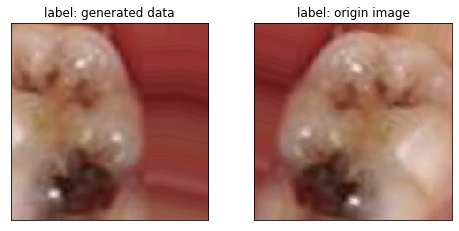

In [23]:
fig = plt.figure(figsize=(16, 8))

subplot = fig.add_subplot(2, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.set_title(f"label: origin image")
subplot.imshow(tmp_img[0])


subplot = fig.add_subplot(2, 2, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.set_title(f"label: generated data")
subplot.imshow(all_generate_img[0][0])


plt.show()

## imagenet과 같은 preprocessing 방식 채용

In [0]:
red_mean = 152.30272
green_mean = 108.262054
blue_mean = 86.357254
red_std = 43.326878
green_std = 48.05693
blue_std = 47.623238

In [0]:
def preprocess_fn(img):
    img[:, :, 0] = (img[:, :, 0] - red_mean)/red_std
    img[:, :, 1] = (img[:, :, 1] - green_mean)/green_std
    img[:, :, 2] = (img[:, :, 2] - blue_mean)/blue_std
    return img

## CNN을 활용한 치아 이미지 분류 모델 학습

In [0]:
datagen3 = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function= preprocess_fn
)

In [27]:
train_generator3 = datagen3.flow_from_directory(
    TRAIN_DIR,
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)

Found 150 images belonging to 3 classes.


## Keras Model 설정

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [29]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(IM_WIDTH, IM_HEIGHT, 3), activation="relu", padding="SAME"))
model.add(MaxPooling2D(pool_size=2, padding="SAME"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="SAME"))
model.add(MaxPooling2D(pool_size=2, padding="SAME"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="SAME"))
model.add(MaxPooling2D(pool_size=2, padding="SAME"))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="SAME"))
model.add(MaxPooling2D(pool_size=2, padding="SAME"))
model.add(Flatten())
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [31]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['acc'])

In [32]:
model.fit(train_generator3, epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





10/10 [==============================] - 26s 3s/step - loss: 2.4888 - acc: 0.3522
Epoch 2/50
10/10 [==============================] - 3s 251ms/step - loss: 1.0417 - acc: 0.3994
Epoch 3/50
10/10 [==============================] - 2s 241ms/step - loss: 1.0532 - acc: 0.5157
Epoch 4/50
10/10 [==============================] - 2s 239ms/step - loss: 0.9687 - acc: 0.4999
Epoch 5/50
10/10 [==============================] - 3s 251ms/step - loss: 0.8907 - acc: 0.5974
Epoch 6/50
10/10 [==============================] - 2s 232ms/step - loss: 0.9401 - acc: 0.5189
Epoch 7/50
10/10 [==============================] - 2s 235ms/step - loss: 0.8755 - acc: 0.6447
Epoch 8/50
10/10 [==============================] - 2s 231ms/step - loss: 0.9356 - acc: 0.5440
Epoch 9/50
10/10 [==============================] - 2s 223ms/step - loss: 0.8535 - acc: 0.5913
Epoch 10/50
10/10 [==========================

## 테스트 데이터 평가

In [0]:
TEST_DIR = "./MyDrive/My Drive/ai/workspace/data/dental_image/test/"

In [34]:
test_datagen = ImageDataGenerator(preprocessing_function= preprocess_fn)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size=60,
    class_mode = "categorical",
    shuffle=False
)


Found 60 images belonging to 3 classes.


In [0]:
X_test, y_test = test_generator.next()
predict = model.predict(X_test)

In [0]:
predict = np.argmax(predict, 1)
target = np.argmax(y_test, 1)

In [37]:
pred02 = (predict == target)
acc = np.sum(pred02) / len(pred02)
acc

0.65

(array([14.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0., 29.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

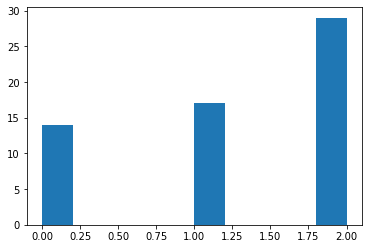

In [38]:
plt.hist(predict)

(array([20.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0., 20.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

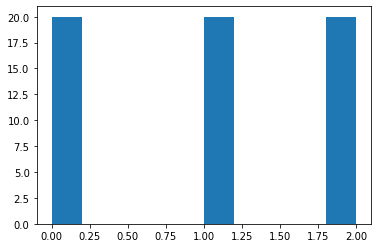

In [39]:
plt.hist(target)